In [1]:
%load_ext autoreload
%autoreload 2
from Network import Network
from FrankWolf import *
from EntropyMaximisation import *

import matplotlib.pyplot as plt
import pandas as pd

MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


## SiouxFalls

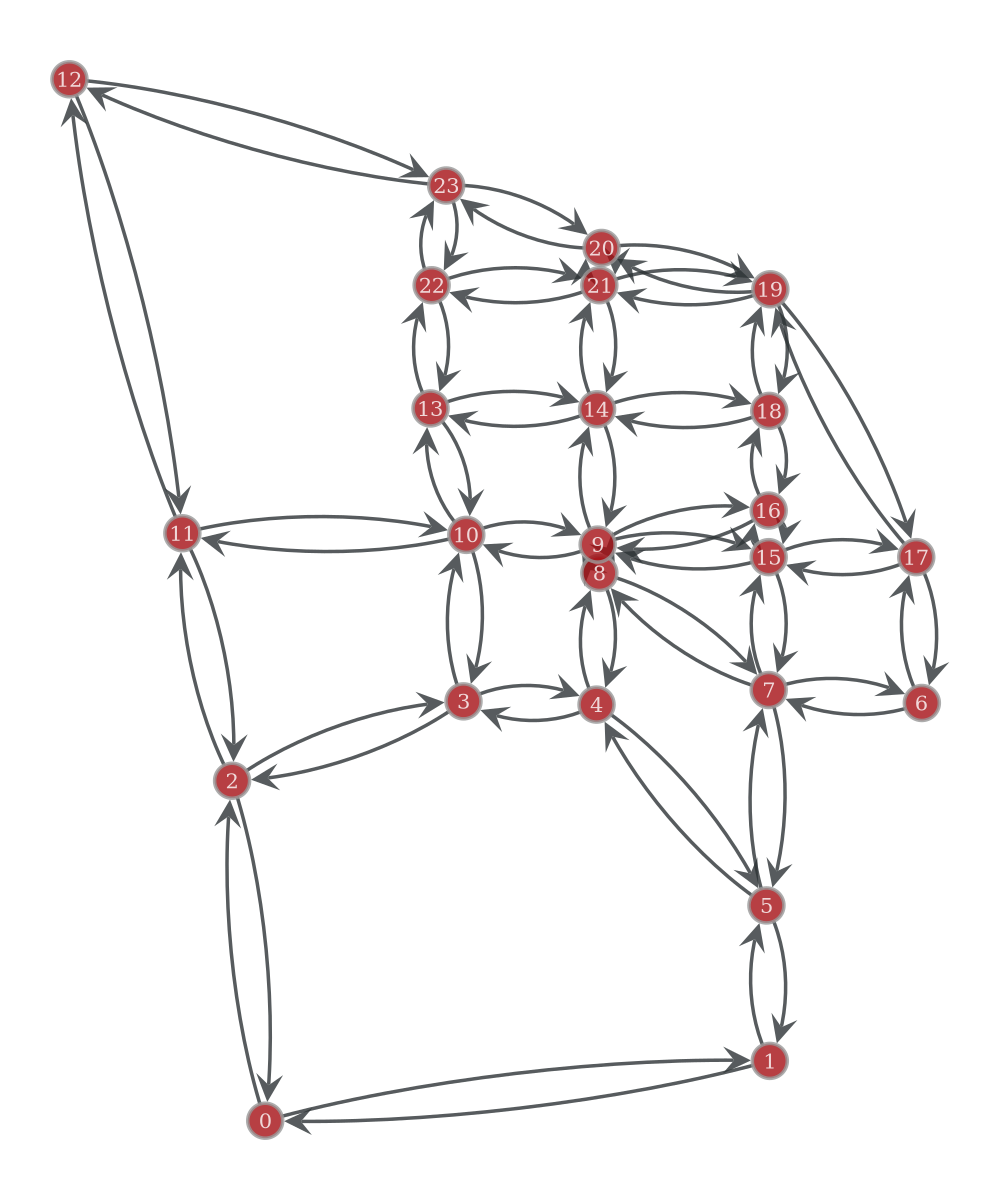

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8a9304b800, at 0x7f8a93187d10>

In [2]:
net = Network("SiouxFalls")
net.draw()

In [ ]:
# Run the frankwolf algorith and save the results
frankwolf_by_origin, frankwolf_flows = frankwolf(net, net.trips, verbose=1, tolerance= 1e-6, n_max=2e5)
net.save_flow(frankwolf_by_origin, "FrankWolf_by_origin")
net.save_flow(frankwolf_flows, "UE")

"""
Performance :

1e-4 in ~1 min
1e-5 in ~10 min
1e-6 in ~1h30
1e-7 in > 3h
"""

0it [00:00, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'files/SiouxFalls_2D_FrankWolf_by_origin'

In [ ]:
# Save the results
net.save_flow(frankwolf_by_origin, "FrankWolf_by_origin")
net.save_flow(frankwolf_flows, "UE")

In [199]:
frankwolf_flows_by_origin, UE_flows = net.load_flow("FrankWolf_by_origin"), net.load_flow("UE")

In [65]:
# Compare the results with the ones availlable online
computed_flows = pd.DataFrame(net.get_edges([UE_flows]), columns=["From", "To", "FrankWolf"])
computed_flows[["From", "To"]] += 1
computed_flows = computed_flows.set_index(["From", "To"])
net.TNTP_flows.columns = net.TNTP_flows.columns.str.rstrip()
df = net.TNTP_flows.set_index(["From", "To"]).join(computed_flows, how="outer")
df["Diff"] = df["Volume"] - df["FrankWolf"]
df.sample(5)

,,Volume,Cost,FrankWolf,Diff
From,To,,,,
24,21,10259.524716,11.752579,10259.488584,0.036133
18,7,15854.621456,2.063186,15854.682547,-0.061090
3,4,14006.371020,4.269402,14006.521938,-0.150918
17,19,9953.021432,7.436627,9953.017884,0.003548
23,14,8394.900178,9.065967,8394.871363,0.028815


In [17]:
flows_by_o = EMARB(net, frankwolf_by_origin, 1)
net.save_flow(flows_by_o, "EMARB_result")

0it [00:00, ?it/s]

1: X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X:   0%|          | 0/24 [00:00<?, ?it/s]

/home/ars/Braess-Links-Identification/EntropyMaximisation.py:32: RuntimeWarning: invalid value encountered in divide
  psi_r_ij[:, in_edge_indices] = np.where(eta_rj[:,[j]] > 0, x_a[:, in_edge_indices]/eta_rj[:,[j]], 0)


2:  . .X.X.X.X. . . .X.X.X.X. .X.X.X. . .X. .X.X.X:   0%|          | 0/24 [00:00<?, ?it/s]

3:  . .X. . . . .X.X.X.X.X. . .X.X.X. .X.X. . .X.X:   0%|          | 0/24 [00:00<?, ?it/s]

4:  .X.X.X. . . .X. .X.X.X.X.X. .X.X. . . .X.X. . :   0%|          | 0/24 [00:00<?, ?it/s]

5:  . .X.X.X. .X.X. .X. .X. .X.X.X.X. . . .X. .X.X:   0%|          | 0/24 [00:00<?, ?it/s]

6:  . .X.X. .X. .X. .X. .X. . .X.X.X. . . .X. . . :   0%|          | 0/24 [00:00<?, ?it/s]

7:  . .X.X.X. . .X. .X. .X. . . .X.X. . . . . . .X:   0%|          | 0/24 [00:00<?, ?it/s]

8:  . .X.X. . . .X. .X. .X.X. .X.X.X. . . . . . . :   0%|          | 0/24 [00:00<?, ?it/s]

9:  . .X.X. .X. .X. .X.X.X. . .X.X.X. .X. .X.X. . :   0%|          | 0/24 [00:00<?, ?it/s]

10:  . .X.X.X.X.X.X. .X.X.X. . . .X.X. . . . . . . :   0%|          | 0/24 [00:00<?, ?it/s]

11:  . .X.X. . . .X. .X. .X. . . .X.X. . . . . . . :   0%|          | 0/24 [00:00<?, ?it/s]

12:  . .X.X.X.X. .X. .X. .X.X. .X.X.X. . . . . . . :   0%|          | 0/24 [00:00<?, ?it/s]

13:  . .X.X. .X. .X. .X. .X. . .X.X.X. . . . . .X.X:   0%|          | 0/24 [00:00<?, ?it/s]

14:  . .X.X.X. . .X. .X.X.X.X. . .X.X. . . .X. . . :   0%|          | 0/24 [00:00<?, ?it/s]

15:  . .X.X. . .X.X. .X.X.X. . . .X.X. . .X. .X. . :   0%|          | 0/24 [00:00<?, ?it/s]

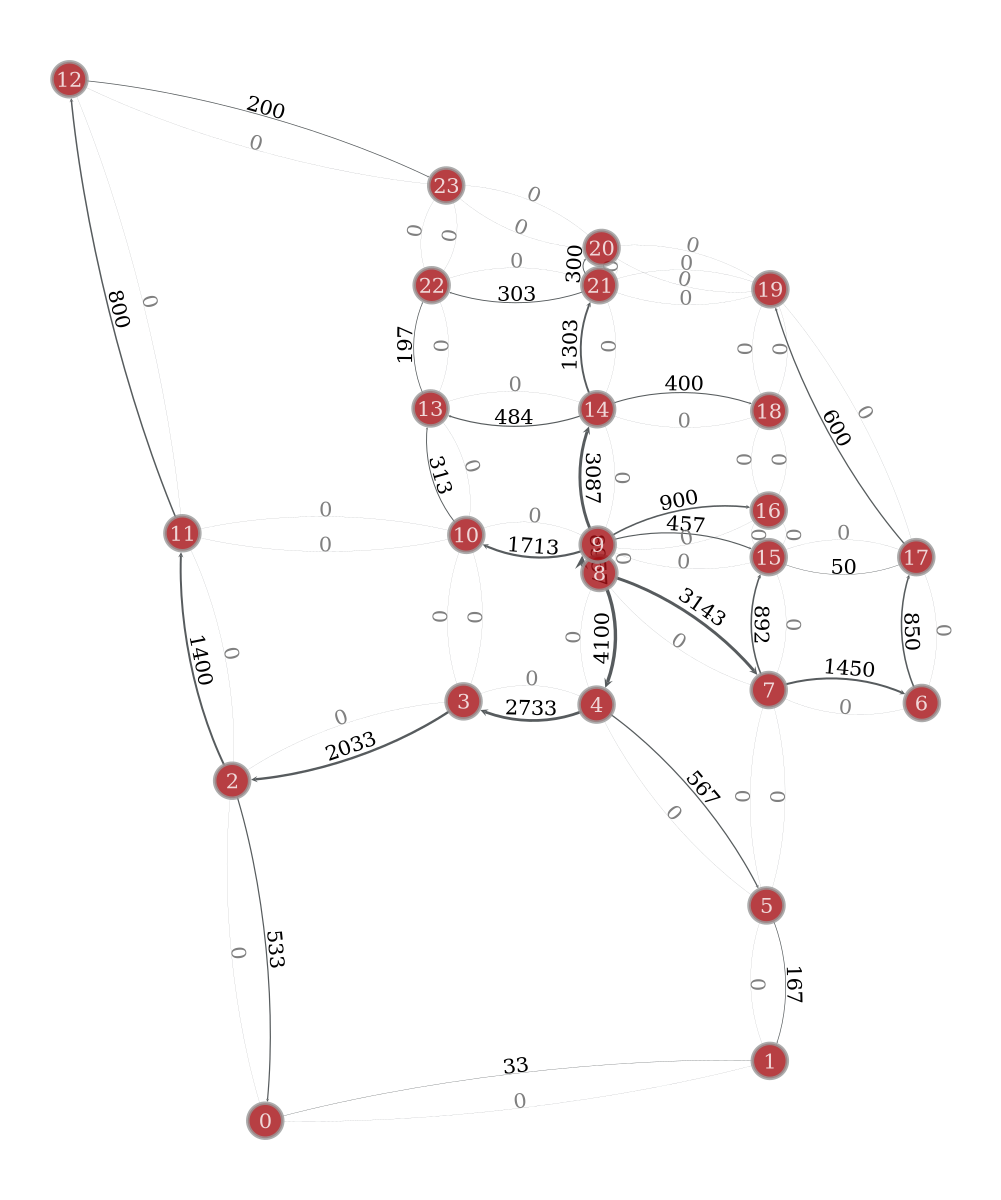

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fed500ecaa0, at 0x7fecafaad130>

In [4]:
EMARB_flows = net.load_flow("EMARB_result")
EMARB_flows.get_2d_array()

net.draw(flows_by_o = EMARB_flows, o=8)

In [197]:
frankwolf_flows_by_origin.get_2d_array()

array([[2.60000316e+03, 6.19999684e+03, 0.00000000e+00, ...,
        0.00000000e+00, 3.63359848e+02, 4.36639163e+02],
       [0.00000000e+00, 1.16459841e+03, 1.26459841e+03, ...,
        0.00000000e+00, 6.58727835e-04, 2.03836138e-04],
       [2.67776812e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 6.58400066e+01, 1.34159768e+02],
       ...,
       [8.16648205e-04, 0.00000000e+00, 1.83328079e-04, ...,
        2.50000225e+03, 0.00000000e+00, 9.62472415e-04],
       [2.32909811e-03, 0.00000000e+00, 0.00000000e+00, ...,
        1.90002765e+03, 7.00011104e+02, 0.00000000e+00],
       [2.90953394e+01, 0.00000000e+00, 0.00000000e+00, ...,
        1.80000120e+03, 3.24908521e+03, 2.65091359e+03]])

In [245]:
OD_flows, paths = get_OD_flows(net, net.trips, flows_by_origin=EMARB_flows, flow_limit=1, return_paths=True)
net.save_flow(OD_flows, "OD_flows")

OD_flows

  0%|          | 0/24 [00:00<?, ?it/s]

array([[[  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [100.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  99.99999999,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        , 399.99699353,   0.        , ...,   0.        ,
         270.3195253 , 129.67746823],
        [  0.        , 299.99972548,   0.        , ...,   0.        ,
           0.        , 299.99972548],
        [  0.        ,  99.99999999,   0.        , ...,   0.        ,
           0.        ,   0.        ]],

       [[  0.        ,   0.        ,  99.99999955, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  99.99999955,  99.99999955, ...,   0.        ,
           0.        ,   0.        ],
        ...,


In [249]:
net.export_flow(OD_flows, "OD_flows", OD_demand=net.trips)

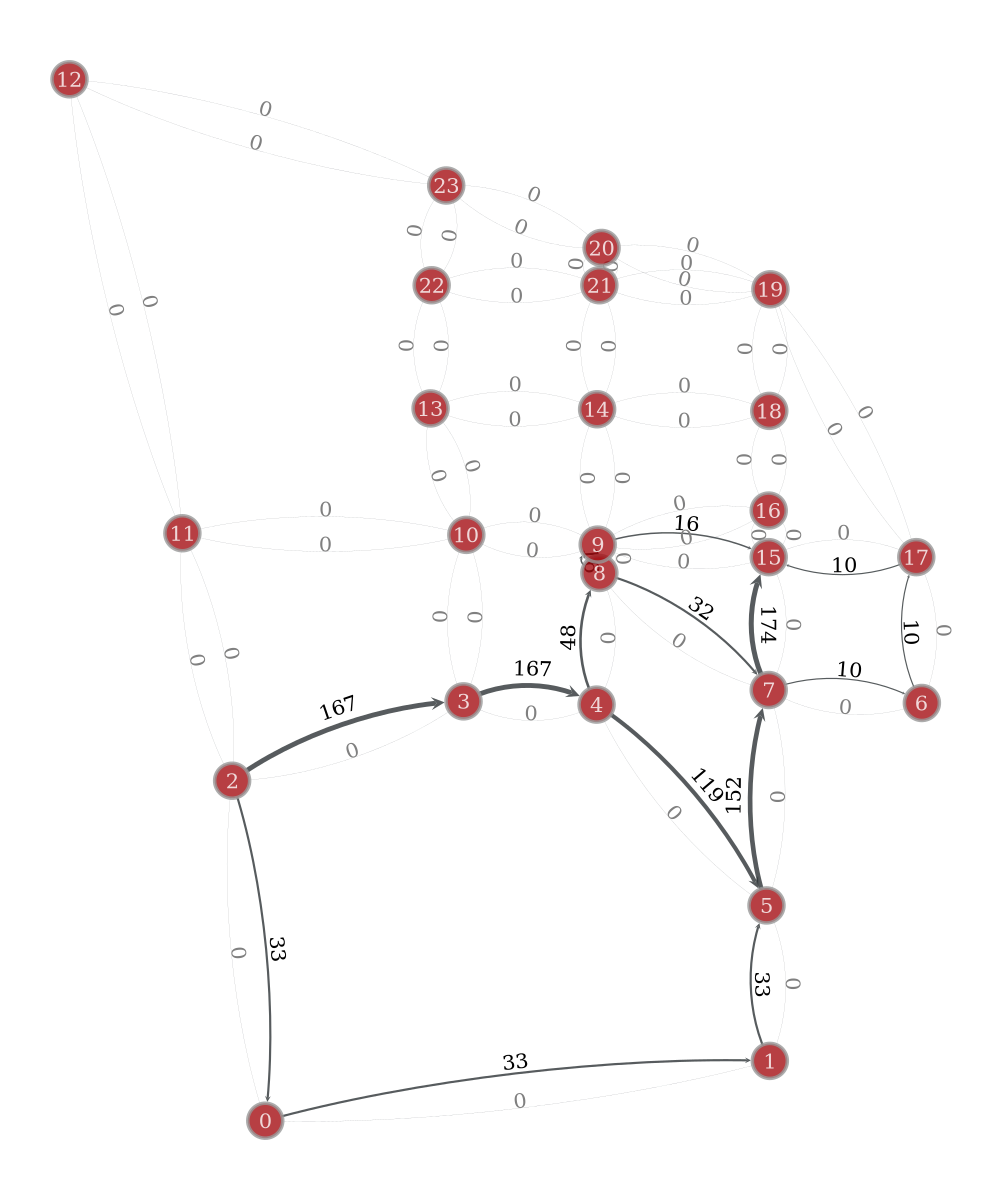

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fed500ecaa0, at 0x7fec644392e0>

In [239]:
net.draw(flows_by_OD = OD_flows, o=2, d=15)

In [247]:
net.export_paths(paths, net.trips)

'  1 ->   0 (100.0):\n\t     100 : [0, 1]\n\n  2 ->   0 (100.0):\n\t     100 : [0, 2]\n\n  3 ->   0 (500.0):\n\t     500 : [0, 2, 3]\n\n  4 ->   0 (200.0):\n\t     200 : [0, 2, 3, 4]\n\n  5 ->   0 (300.0):\n\t     300 : [0, 1, 5]\n\n  6 ->   0 (500.0):\n\t     500 : [0, 1, 5, 7, 6]\n\n  7 ->   0 (800.0):\n\t     800 : [0, 1, 5, 7]\n\n  8 ->   0 (500.0):\n\t     500 : [0, 2, 3, 4, 8]\n\n  9 ->   0 (1300.0):\n\t 1.3e+03 : [0, 2, 3, 4, 8, 9]\n\n 10 ->   0 (500.0):\n\t     500 : [0, 2, 3, 10]\n\n 11 ->   0 (200.0):\n\t     200 : [0, 2, 11]\n\n 12 ->   0 (500.0):\n\t     500 : [0, 2, 11, 12]\n\n 13 ->   0 (300.0):\n\t     300 : [0, 2, 3, 10, 13]\n\n 14 ->   0 (500.0):\n\t     500 : [0, 2, 3, 4, 8, 9, 14]\n\n 15 ->   0 (500.0):\n\t    29.3 : [0, 1, 5, 7, 6, 17, 15]\n\t     471 : [0, 1, 5, 7, 15]\n\n 16 ->   0 (400.0):\n\t     400 : [0, 2, 3, 4, 8, 9, 16]\n\n 17 ->   0 (100.0):\n\t     100 : [0, 1, 5, 7, 6, 17]\n\n 18 ->   0 (300.0):\n\t     300 : [0, 2, 3, 4, 8, 9, 14, 18]\n\n 19 ->   0 (300

In [7]:
# Compute SO flows
SO_fw_by_origin, SO_flows = frankwolf(net, net.trips, z_prime_function=SO_z_prime_function, verbose=3, tolerance= 1e-2, n_max=2e5)
net.save_flow(SO_fw_by_origin, "SO_fw_by_origin")
net.save_flow(SO_flows, "SO_flows")
net.export_flow(SO_fw_by_origin, "SO_fw_by_origin")
net.export_flow(SO_flows, "SO_flows")

0it [00:00, ?it/s]

0 0.9025644536734801
[ 3800.  6000.  3800.  6600.  6000. 10200.  6800.  9200. 14500.  6600.
 13600. 11000.  7000.  6600. 10100. 17700.  8000. 13200. 16800.  8100.
   800. 15500.  7000.   800. 17000. 17100. 22100. 11200. 28000.     0.
  6600. 21100. 12300. 16800.  7800. 11300. 12000. 12100. 10800. 16900.
 10800.  7700. 11300. 10800. 18400. 22900. 14700. 28900. 26700. 14700.
     0. 26700. 21900. 13100. 14800. 12200. 18400. 21900.  4500. 12100.
  4500.  4400.  5400.  4300. 13000. 12800. 22900.  5300. 13000.  5900.
  7800.  5800.  5700. 10800. 12700.  5700.]
[ 5100. 12800.  4800.  1900. 13100. 31200. 22200. 29600. 33000. 22400.
 42000.  5700. 39300.  1600.  6000.     0. 22100. 18300.     0. 22000.
 23800.     0. 48000. 23700. 33000. 41700.     0. 50900.     0. 23400.
 11900. 10400.     0.     0. 24100.     0. 17500. 19500. 13700.     0.
  4800.  9300. 49100.  6500. 44100.     0.     0.     0.     0. 26100.
 23400.     0.     0. 18400. 26100. 24700. 43900.     0. 43700. 24700.
 43500. 1100

ValueError: f(a) and f(b) must have different signs

## Example

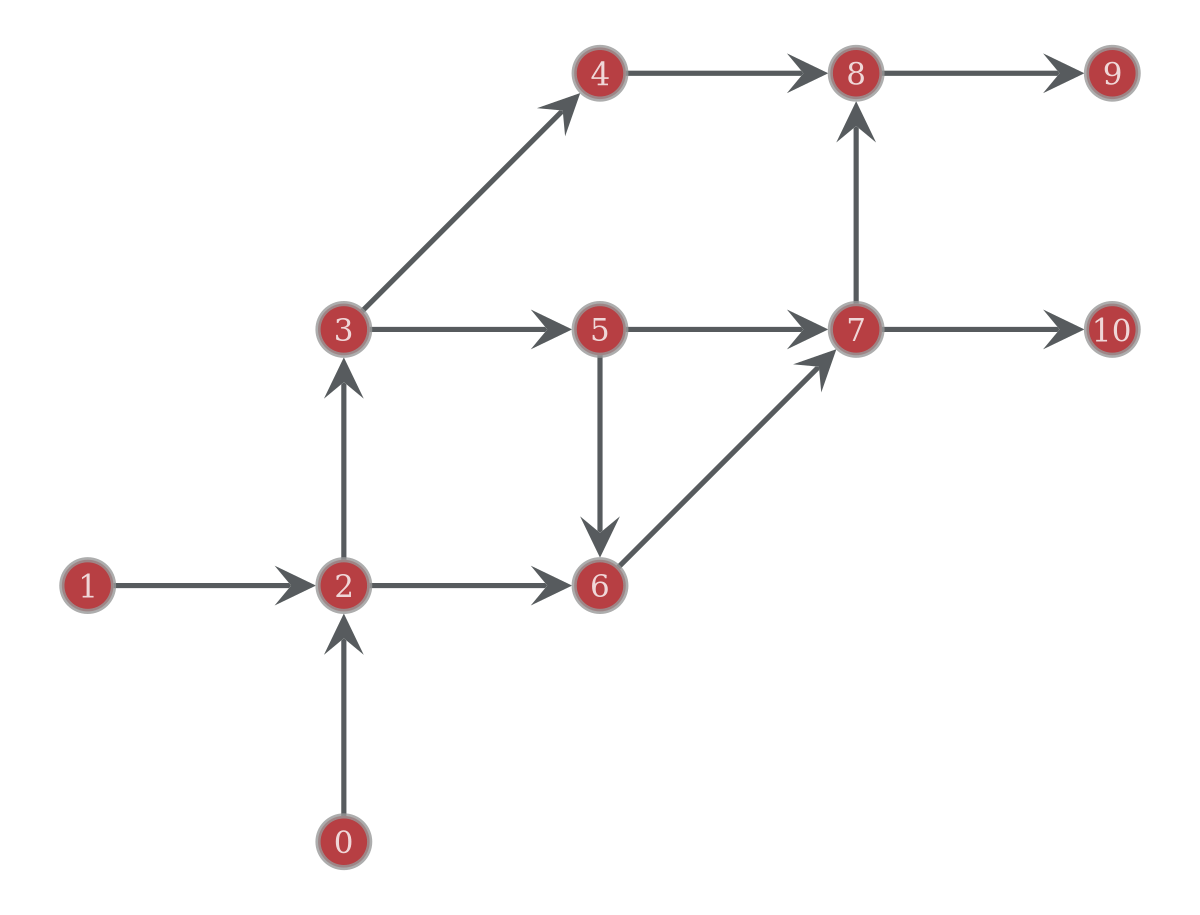

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb504bf7530, at 0x7fb52007ecf0>

In [81]:
net = Network("Example")
net.draw()

In [82]:
OD = np.zeros((net.num_vertices(), net.num_vertices()))
OD[0,9] = 200
OD[0, 10] = 160
OD[1, 9] = 80
OD[1, 10] = 40
OD

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200., 160.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  80.,  40.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [90]:
edges_indices = net.get_edges([net.edge_index])
edges_indices[:, :2] +=1
edges_indices

array([[ 1,  3,  0],
       [ 2,  3,  1],
       [ 3,  4,  2],
       [ 3,  7,  3],
       [ 4,  5,  4],
       [ 4,  6,  5],
       [ 5,  9,  6],
       [ 6,  7,  7],
       [ 6,  8,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 8, 11, 11],
       [ 9, 10, 12]])

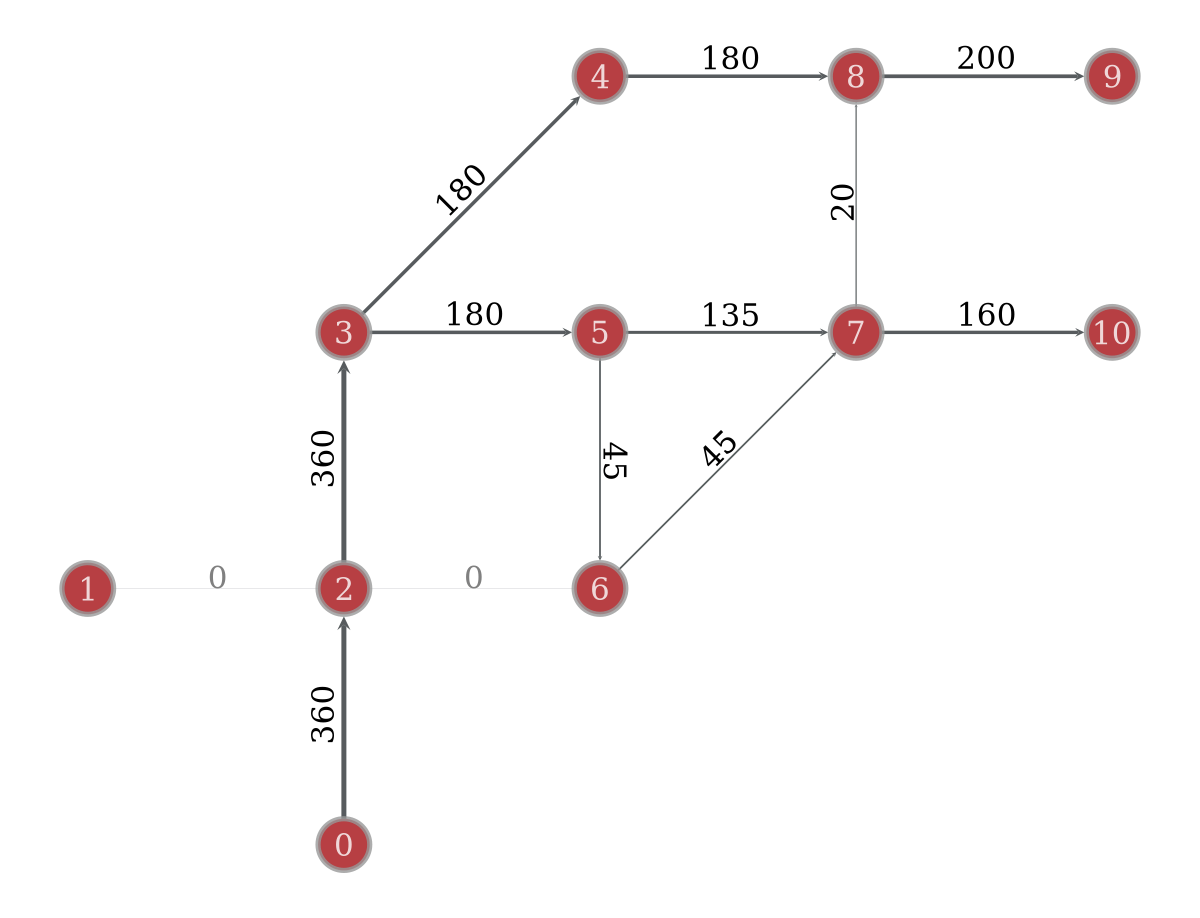

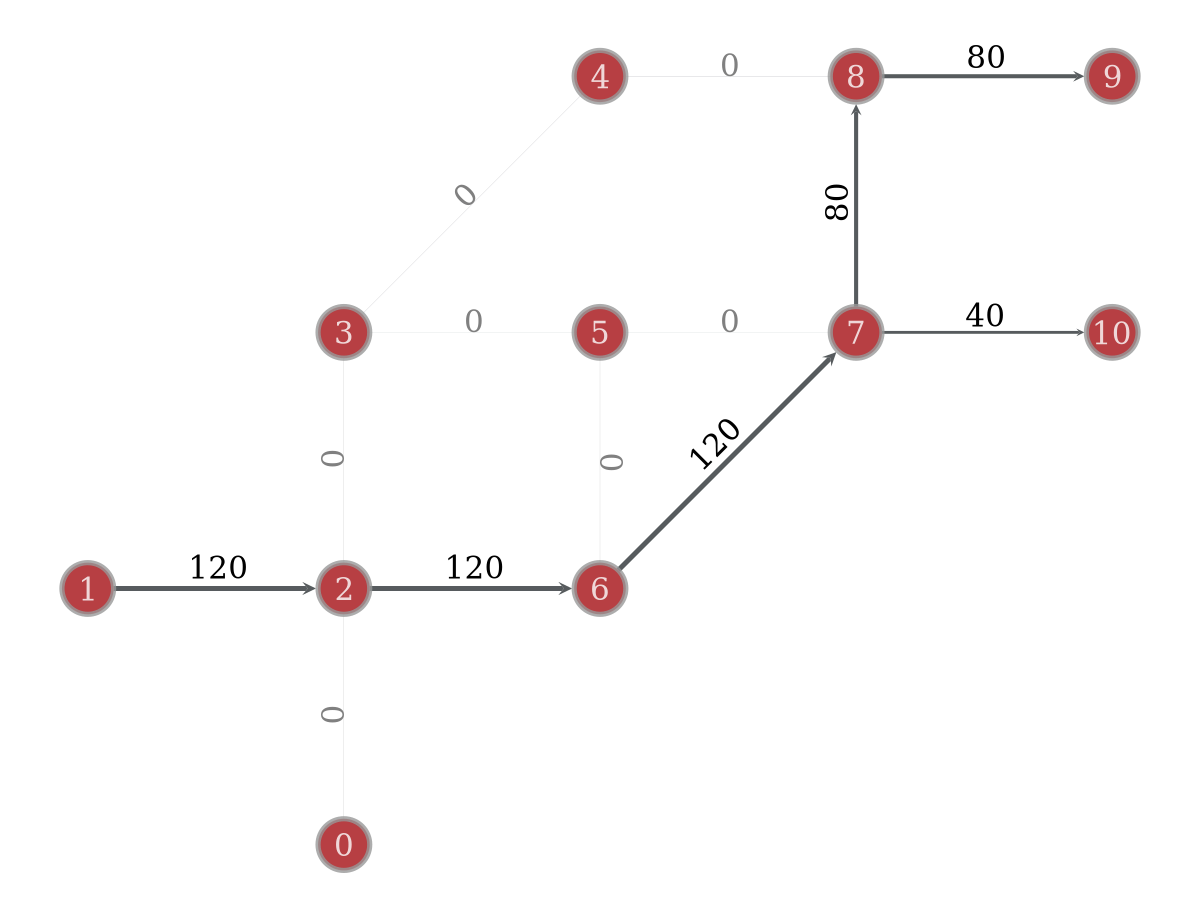

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb504bf7530, at 0x7fb585c3f320>

In [92]:
flows_by_o = net.new_edge_property("vector<float>", vals=np.zeros((net.num_edges(), net.num_vertices())))
a = flows_by_o.get_2d_array()
a[0] = [360, 0, 360, 0, 180, 180, 180, 45, 135, 45, 20, 160, 200]
a[1] = [0, 120, 0, 120, 0, 0, 0, 0, 0, 120, 80, 40, 80]
flows_by_o.set_2d_array(a)
net.draw(flows_by_o=flows_by_o, o=0)
net.draw(flows_by_o=flows_by_o, o=1)

In [ ]:
flows_by_o = EMARB(net, frankwolf_by_origin, 1)
net.save_flow(flows_by_o, "EMARB_result")

In [94]:
x_n, residuals = backward_entropy_maximisation(net, flows_by_o, 7)
new_flows = forward_entropy_maximization(net, x_n, residuals, 8)

/home/ars/Braess-Links-Identification/EntropyMaximisation.py:32: RuntimeWarning: invalid value encountered in divide
  psi_r_ij[:, in_edge_indices] = np.where(eta_rj[:,[j]] > 0, x_a[:, in_edge_indices]/eta_rj[:,[j]], 0)


'Graph E'

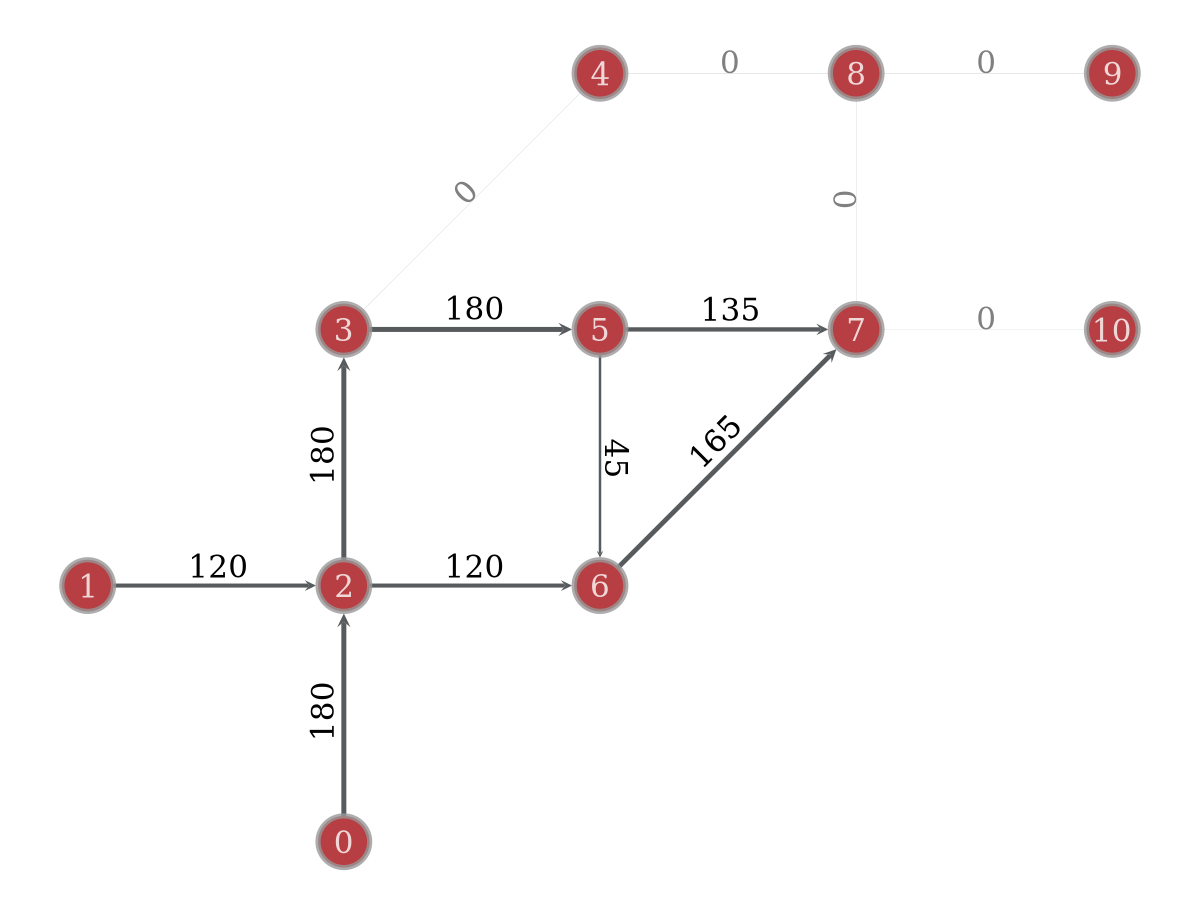

'Graph F'

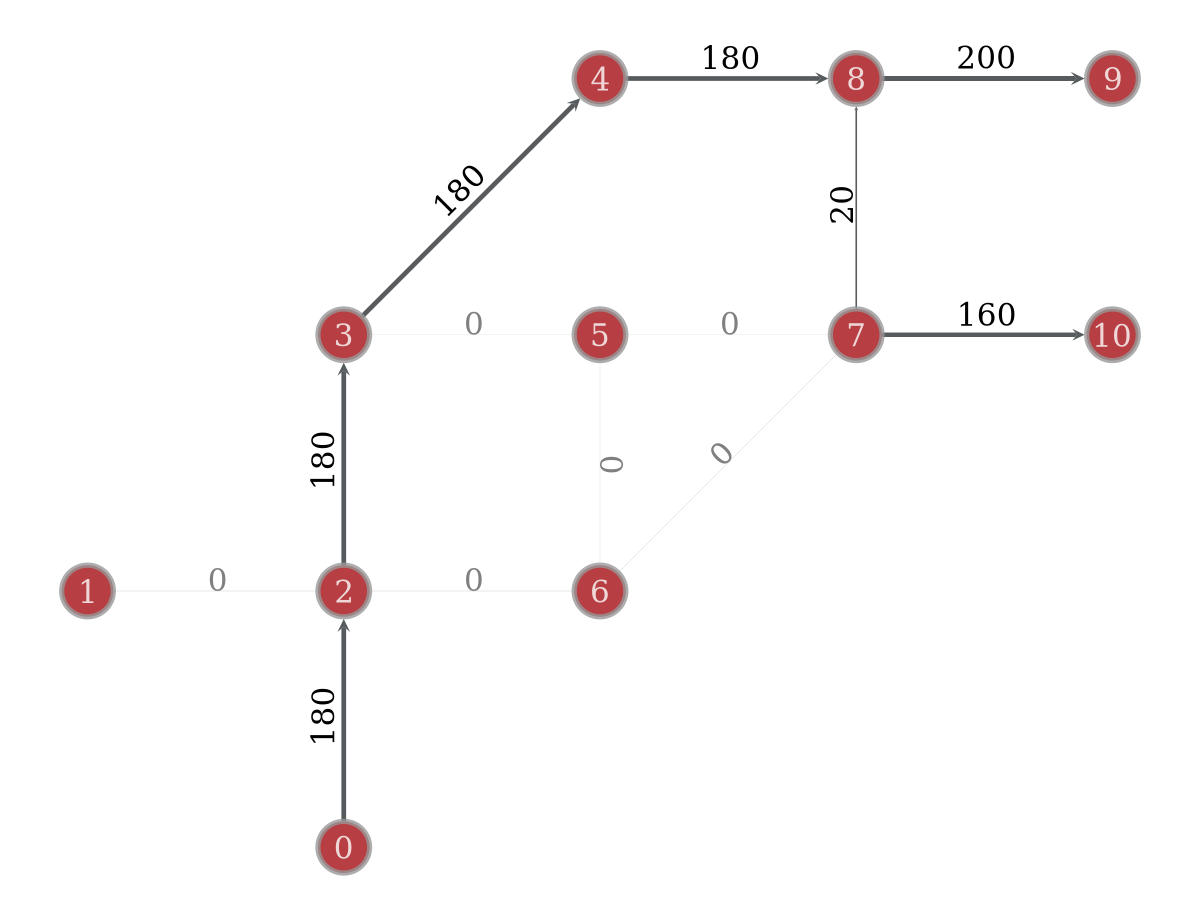

'Graph G'

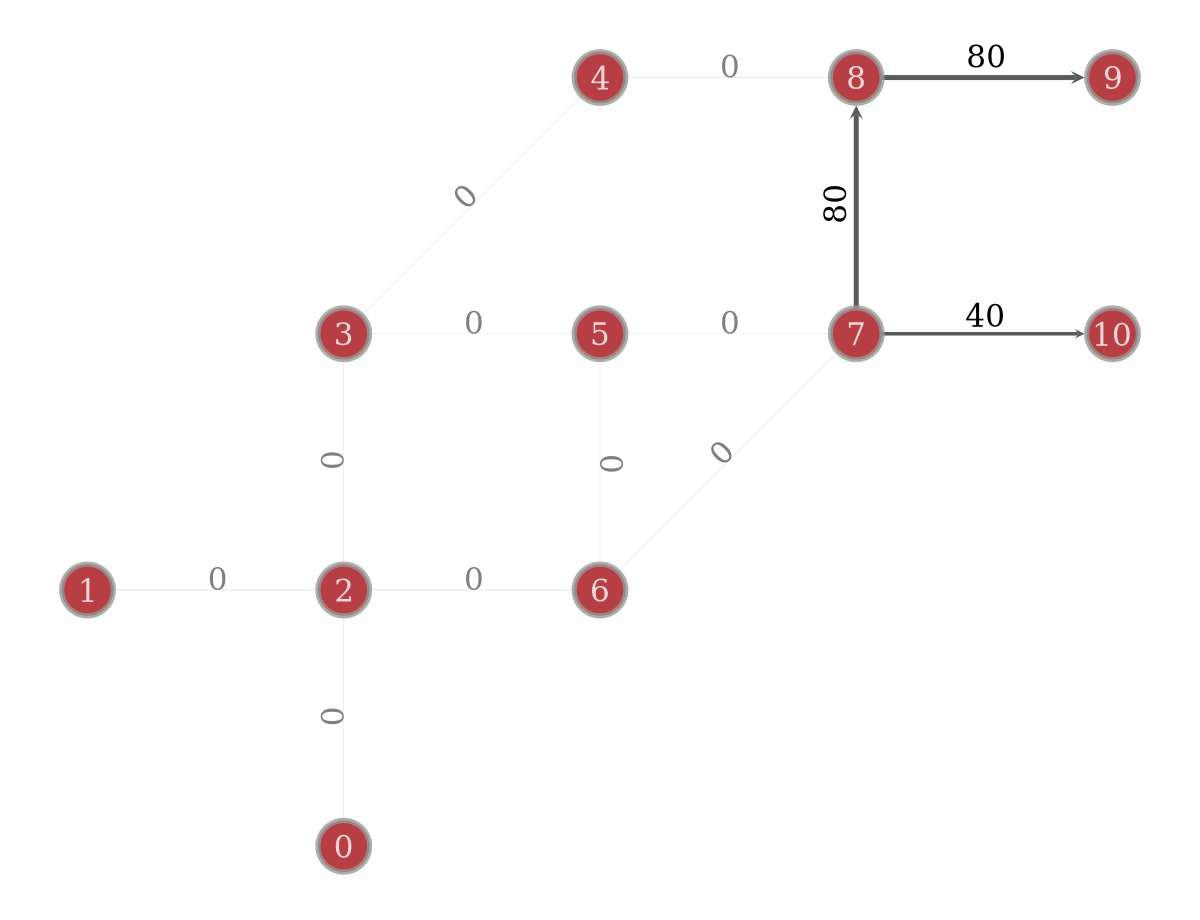

'Graph K'

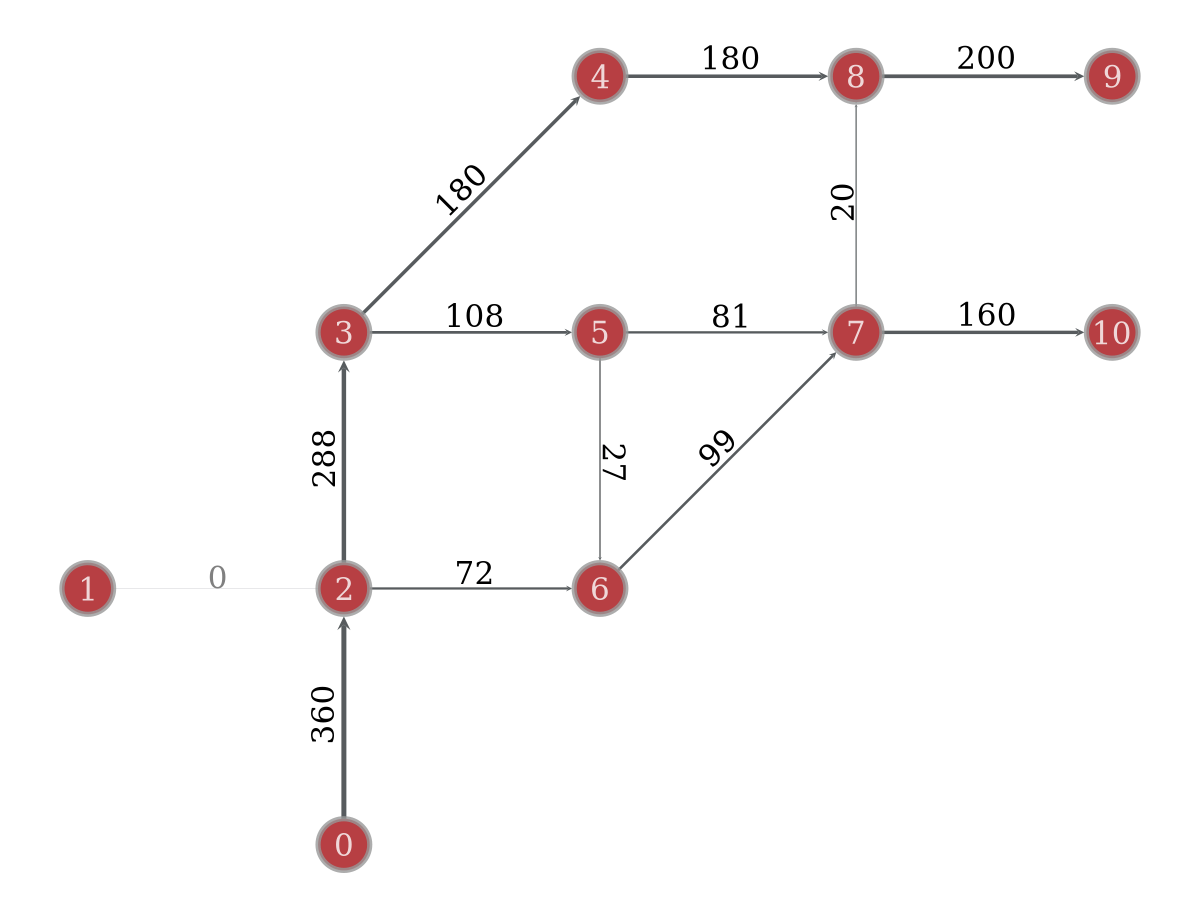

'Graph L'

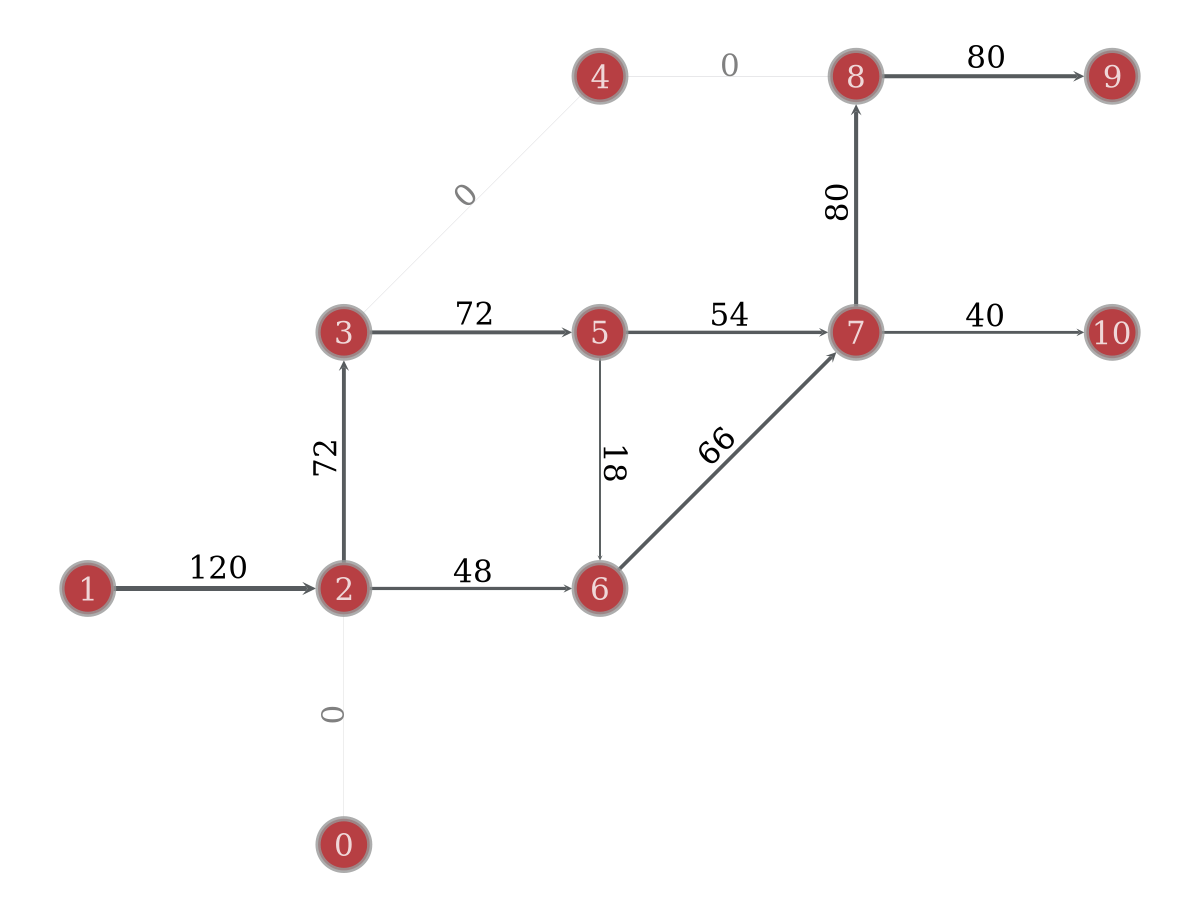

'Figure 1'

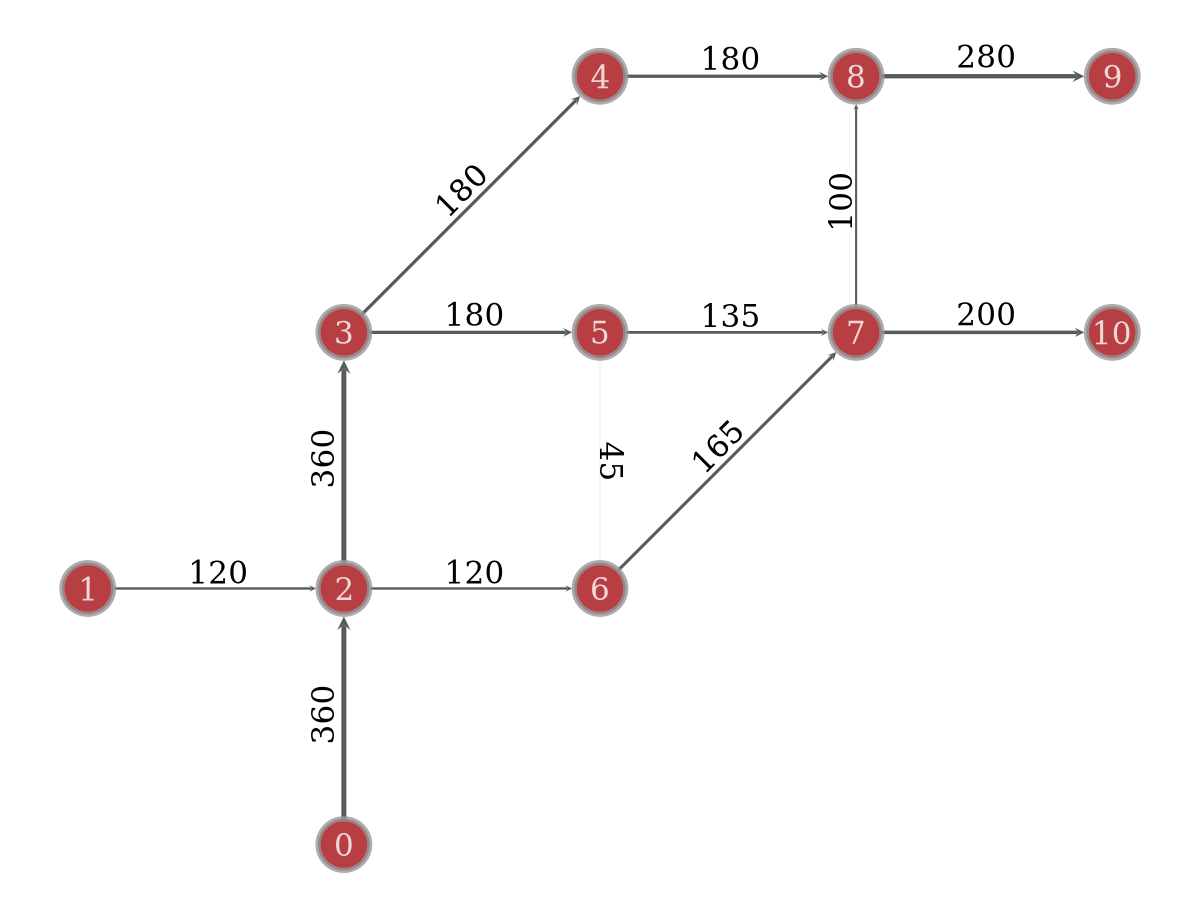

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb504bf7530, at 0x7fb547310650>

In [99]:
display("Graph E")
net.draw(flows=x_n)
display("Graph F")
net.draw(flows_by_o=residuals, o=0)
display("Graph G")
net.draw(flows_by_o=residuals, o=1)
display("Graph K")
net.draw(flows_by_o=new_flows, o=0)
display("Graph L")
net.draw(flows_by_o=new_flows, o=1)
display("Figure 1")
net.draw(flows_by_o=new_flows, o="sum")